# Anomaly detection



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def multivariate_gauss(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.pinv(cov)
    tmp = ((x - mu).T * (inv @ (x - mu).T)).sum(axis=0)
    return 1. / ((2 * np.pi) ** (x.shape[1] / 2) * np.sqrt(det)) * np.exp(-0.5 * tmp)

def precision(p, eta, x, y):
    true_positive = ((p(x) > eta) & (y == 1)).sum()
    false_positive = ((p(x) > eta) & (y == 0)).sum()
    return 1 if true_positive == 0 and false_positive == 0 else true_positive / (true_positive + false_positive)

def recall(p, eta, x, y):
    true_positive = ((p(x) > eta) & (y == 1)).sum()
    false_negative = ((p(x) <= eta) & (y == 1)).sum()
    return 1 if true_positive == 0 and false_negative == 0 else true_positive / (true_positive + false_negative)

def f1_score(h, theta, x, y):
    p = precision(h, theta, x, y)
    r = recall(h, theta, x, y)
    return 2 * p * r / (p + r)

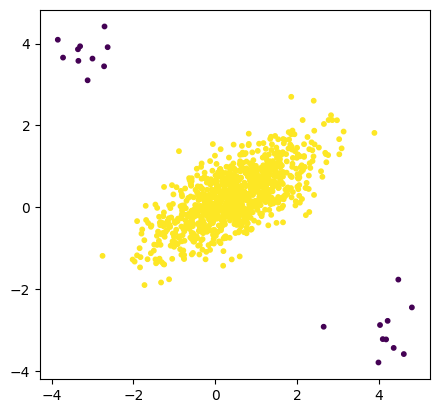

In [3]:
np.random.seed(42)

samples=1_000
x_ok = np.random.multivariate_normal(mean=[.5, 0.25], cov=[[1, .5],[.5, .5]], size=samples)
x_anomaly0 = np.random.multivariate_normal(mean=[-3, 4], cov=[[.2, 0],[0, .2]], size=10)
x_anomaly1 = np.random.multivariate_normal(mean=[4, -3], cov=[[.2, 0],[0, .2]], size=10)

x = np.vstack((x_ok, x_anomaly0, x_anomaly1))
y = np.vstack((np.ones(x_ok.shape), np.zeros(x_anomaly0.shape), np.zeros(x_anomaly1.shape)))[:,0]

fig, ax = plt.subplots()
ax.scatter(x[:, 0], x[:, 1], s=10,c=y)
ax.set_aspect(aspect=1)
plt.show()

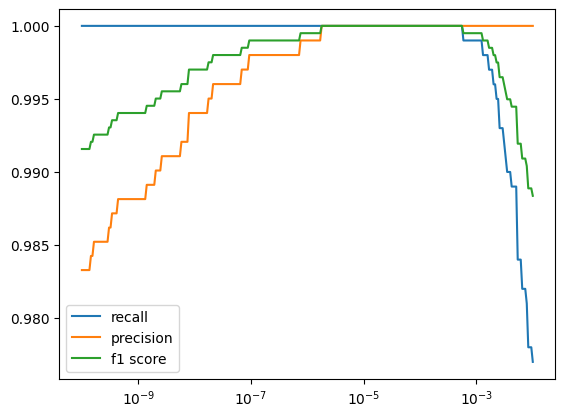

In [4]:
mu = x.mean(axis=0)
m = x.shape[0]
n = x.shape[1]
cov = 1. / m * (x - mu).T @ (x - mu)
p = lambda x: multivariate_gauss(x, mu, cov)

data = []
for eta in np.logspace(-10,-2, 300):
    data.append([eta, recall(p, eta, x, y), precision(p, eta, x, y), f1_score(p, eta, x, y)])
data = np.array(data)

fig, ax = plt.subplots()
ax.plot(data[:, 0], data[:, 1], label='recall')
ax.plot(data[:, 0], data[:, 2], label='precision')
ax.plot(data[:, 0], data[:, 3], label='f1 score')
ax.set_xscale('log')
ax.legend()
plt.show()

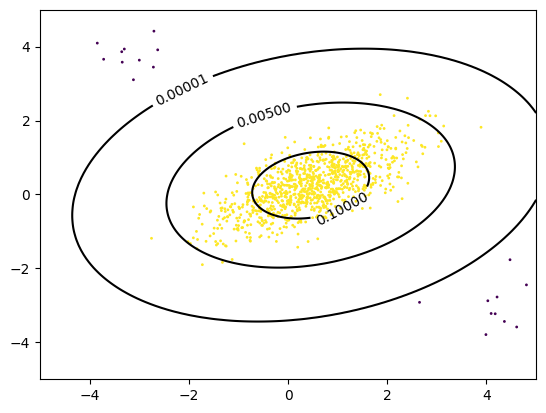

In [5]:
p = np.linspace(-5, 5, 200)
q = np.linspace(-5, 5, 200)
P, Q = np.meshgrid(p, q)
PQ = np.vstack((P.flatten(), Q.flatten())).T
hPQ = multivariate_gauss(PQ, mu, cov).reshape(P.shape)

fig, ax = plt.subplots()
ax.scatter(x[:, 0], x[:, 1], s=1, c=y)
cont = plt.contour(P, Q, hPQ, levels=[1e-5, 5e-3, 1e-1], colors=['black'])
ax.clabel(cont, cont.levels, inline=True, fontsize=10)
plt.show()